In [2]:
import sys; sys.path.append("../../")
import pandas as pd
import matplotlib.pyplot as plt
from DataPreprocessing.DataPreprocessing import *
from utils import *
from CorrelationAnalysis import *
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')


# Analyze Installs


## Question 1
    Is there certain app category have highest installs? does category affect installs? 

## Read Data

In [3]:
# read data as dataframe from csv file
df = pd.read_csv('../../Dataset/Preprocessed_data.csv', error_bad_lines=False)
print(df.shape)

C:\Users\dell\AppData\Local\Temp\ipykernel_18336\377713779.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('../../Dataset/Preprocessed_data.csv', error_bad_lines=False)
b'Skipping line 78700: expected 20 fields, saw 21\nSkipping line 85033: expected 20 fields, saw 21\n'
b'Skipping line 128092: expected 20 fields, saw 22\n'
b'Skipping line 197000: expected 20 fields, saw 21\nSkipping line 218421: expected 20 fields, saw 21\n'
b'Skipping line 330474: expected 20 fields, saw 21\nSkipping line 337681: expected 20 fields, saw 21\n'
b'Skipping line 556266: expected 20 fields, saw 21\n'
b'Skipping line 641092: expected 20 fields, saw 21\n'
b'Skipping line 759119: expected 20 fields, saw 21\n'
b'Skipping line 801997: expected 20 fields, saw 22\n'
b'Skipping line 823248: expected 20 fields, saw 21\n'
b'Skipping line 1044981: expected 20 fields, saw 21\n'
b'Skipping line 1138871: e

(1900333, 20)


In [4]:
df.head()


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0,10+,10,15,True,0.0,10000000,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64,"5,000+",5000,7662,True,0.0,2.9000000,5.0 and up,Webserveis,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0,50+,50,58,True,0.0,3.7000000,4.0.3 and up,Cabin Crew,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5,10+,10,19,True,0.0,1.8000000,4.0.3 and up,Climate Smart Tech2,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0,100+,100,478,True,0.0,6.2000000,4.1 and up,Rafal Milek-Horodyski,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False


## Clean

In [5]:
df = convert_to_numeric(df)
df=convert_binary(df)

../..\DataPreprocessing\DataPreprocessing.py:223: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)
../..\DataPreprocessing\DataPreprocessing.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.replace('True', '1')
../..\DataPreprocessing\DataPreprocessing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [6]:
df.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
1124562,Rank Race - Longest Multiplayer Racing Game,com.sathwikm.rankrace,Racing,4.5,8,50.0,50,57,1,0.0,26.000000,4.4,Sathwik M,emailsathwik@gmail.com,"May 14, 2021","Jun 06, 2021",Everyone,0,0,0
423790,Radio Antigua and Barbuda + All Stations - Liv...,com.alexto.radio.antiguaandbarbuda,Music & Audio,5.0,27,100.0,100,419,1,0.0,0.000009,4.1,"AppTwo - Radio FM AM, Radio Online, Internet R...",Americo.1993.9090@gmail.com,"Apr 12, 2020","Apr 12, 2020",Teen,1,0,0
957019,What do i wear?,com.puntogris.whatdoiwear,Weather,0.0,0,50.0,50,86,1,0.0,0.000005,5.0,Puntogris,puntogrisdev@gmail.com,"Dec 11, 2020","Dec 15, 2020",Everyone,0,0,0
674483,İslami Puzzle,re.ozdemir.android.jigsaw,Educational,0.0,0,100.0,100,192,1,0.0,0.000005,2.3.3,Sezgin Özdemir,sezginozdemir41@gmail.com,"Nov 23, 2017","Nov 23, 2017",Everyone,1,0,0
1583046,Baridin Ratminah dan Kemat Cinta Jaran Goyang,com.tarlingbaridin.gembokcinta.selawase,Books & Reference,3.9,34,5000.0,5000,5376,1,0.0,0.000005,4.0.3,Gembok Cinta,eviwahyuningsih64@gmail.com,"Dec 23, 2018","Aug 21, 2019",Everyone,1,0,0
950507,KING TOYS,com.king.toys,Entertainment,3.6,18,1000.0,1000,2688,1,0.0,20.000000,2.2,LIU DEV,2223703058@qq.com,"Jun 17, 2017","Jun 17, 2017",Everyone,0,0,0
470742,Botany4Thai,com.waipribstudio.botany4thai,Books & Reference,4.1,28,1000.0,1000,2871,1,0.0,16.000000,4.1,The Botanical Garden Organization,teelek88@gmail.com,"Nov 25, 2015","Dec 02, 2018",Everyone,0,0,0
773621,English Hindi Translator + Dictionary,com.deethu94.Language_translatorthunkablebest,Education,0.0,0,50.0,50,98.0,1,0.0,0.000006,4.0,DEETHU94 Inc.,curiousdesi@gmail.com,"Aug 30, 2019","Sep 06, 2019",Everyone,1,0,0
376227,Fire & Ice Magic Touch,com.amar.fire.ice.magic.touch,Productivity,4.1,33,1000.0,1000,2602,1,0.0,0.000006,4.2,Amar Kumar Apps,kumaramar77@yahoo.in,"May 19, 2018","Nov 01, 2019",Everyone,1,0,0
1427470,روائع اغاني فيروز المميزة بدون نت,com.ntchapps.fairouz,Music & Audio,4.3,14,1000.0,1000,3057,1,0.0,60.000000,4.1,Rigolas Studio,mofarkachon@gmail.com,"Jul 14, 2019","Jan 03, 2020",Everyone,1,0,0


In [7]:
df_cat_installs = df.groupby(['Category'], group_keys=True).apply(lambda x: x)
df_cat_installs.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
1124562,Rank Race - Longest Multiplayer Racing Game,com.sathwikm.rankrace,Racing,4.5,8,50.0,50,57,1,0.0,26.000000,4.4,Sathwik M,emailsathwik@gmail.com,"May 14, 2021","Jun 06, 2021",Everyone,0,0,0
423790,Radio Antigua and Barbuda + All Stations - Liv...,com.alexto.radio.antiguaandbarbuda,Music & Audio,5.0,27,100.0,100,419,1,0.0,0.000009,4.1,"AppTwo - Radio FM AM, Radio Online, Internet R...",Americo.1993.9090@gmail.com,"Apr 12, 2020","Apr 12, 2020",Teen,1,0,0
957019,What do i wear?,com.puntogris.whatdoiwear,Weather,0.0,0,50.0,50,86,1,0.0,0.000005,5.0,Puntogris,puntogrisdev@gmail.com,"Dec 11, 2020","Dec 15, 2020",Everyone,0,0,0
674483,İslami Puzzle,re.ozdemir.android.jigsaw,Educational,0.0,0,100.0,100,192,1,0.0,0.000005,2.3.3,Sezgin Özdemir,sezginozdemir41@gmail.com,"Nov 23, 2017","Nov 23, 2017",Everyone,1,0,0
1583046,Baridin Ratminah dan Kemat Cinta Jaran Goyang,com.tarlingbaridin.gembokcinta.selawase,Books & Reference,3.9,34,5000.0,5000,5376,1,0.0,0.000005,4.0.3,Gembok Cinta,eviwahyuningsih64@gmail.com,"Dec 23, 2018","Aug 21, 2019",Everyone,1,0,0


In [8]:

Installs = df.Installs.mean()

df_cat_avg_installs = df.groupby(['Category'])['Installs'].sum()

df_cat_avg_installs.head()

Category
Action             4342801.0
Adventure          4282193.0
Arcade             6454957.0
Art & Design       4063541.0
Auto & Vehicles    3594595.0
Name: Installs, dtype: float64

## Select Interesting  Variables

In [9]:
features_df = df[[ 'Installs', 'Size', 'Category','Minimum Android','Rating']]
print(features_df.shape)

(285043, 5)


In [10]:
features_df.head(10)

,Installs,Size,Category,Minimum Android,Rating
1124562,50.0,26.000000,Racing,4.4,4.5
423790,100.0,0.000009,Music & Audio,4.1,5.0
957019,50.0,0.000005,Weather,5.0,0.0
674483,100.0,0.000005,Educational,2.3.3,0.0
1583046,5000.0,0.000005,Books & Reference,4.0.3,3.9
950507,1000.0,20.000000,Entertainment,2.2,3.6
470742,1000.0,16.000000,Books & Reference,4.1,4.1
773621,50.0,0.000006,Education,4.0,0.0
376227,1000.0,0.000006,Productivity,4.2,4.1
1427470,1000.0,60.000000,Music & Audio,4.1,4.3


## Installs values distribution
   

Text(0.5, 1.0, 'Average Installs per Category')

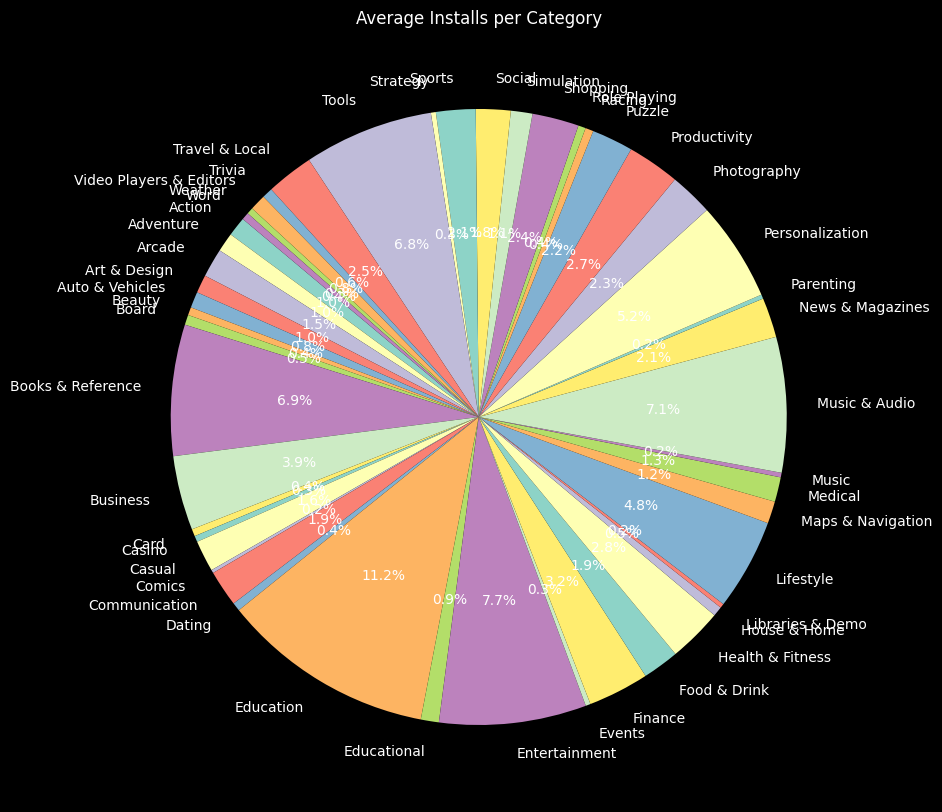

In [11]:
# plot pie chart for installs values
plt.figure(figsize=(10,10))
plt.pie(df_cat_avg_installs, labels=df_cat_avg_installs. index, autopct='%1.1f%%',  startangle=140)
plt.title('Average Installs per Category')


### Top 20 Categories

<Axes: title={'center': 'Top 10 Categories by Installs'}, xlabel='Category'>

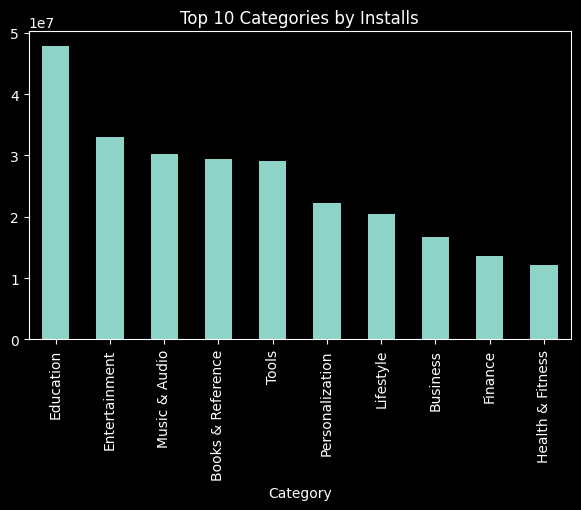

In [26]:
#get unique values of content rating
df_cat_avg_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
df_cat_avg_installs.nlargest(20).plot(kind='bar', figsize=(7, 4), title='Top 10 Categories by Installs')

### Results:
    there's significance difference between number of installs
    in each category, so company may focus on top categories when
    designing new apps.

### Mean of app installs for ad supported/ not supported

Text(0, 0.5, 'Installs')

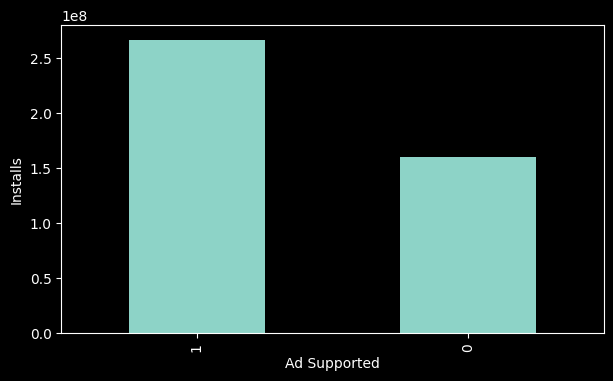

In [13]:
#get unique values of content rating
app_rating = df.groupby('Ad Supported')['Installs'].sum().sort_values(ascending=False).head(10)
app_rating.nlargest(15).plot(kind='bar', figsize=(7, 4))
plt.ylabel('Installs')


In [14]:
ANOVA_test(df, 'Ad Supported', 'Rating')

0.0

## Question 2
    Is there a relation between size and installs?

Text(0, 0.5, 'Installs')

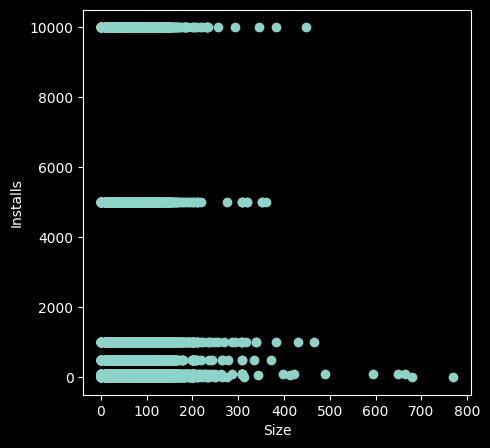

In [15]:
#scatter size vs installs
plt.figure(figsize=(5,5))
plt.scatter(df['Size'], df['Installs'])
plt.xlabel('Size')
plt.ylabel('Installs')

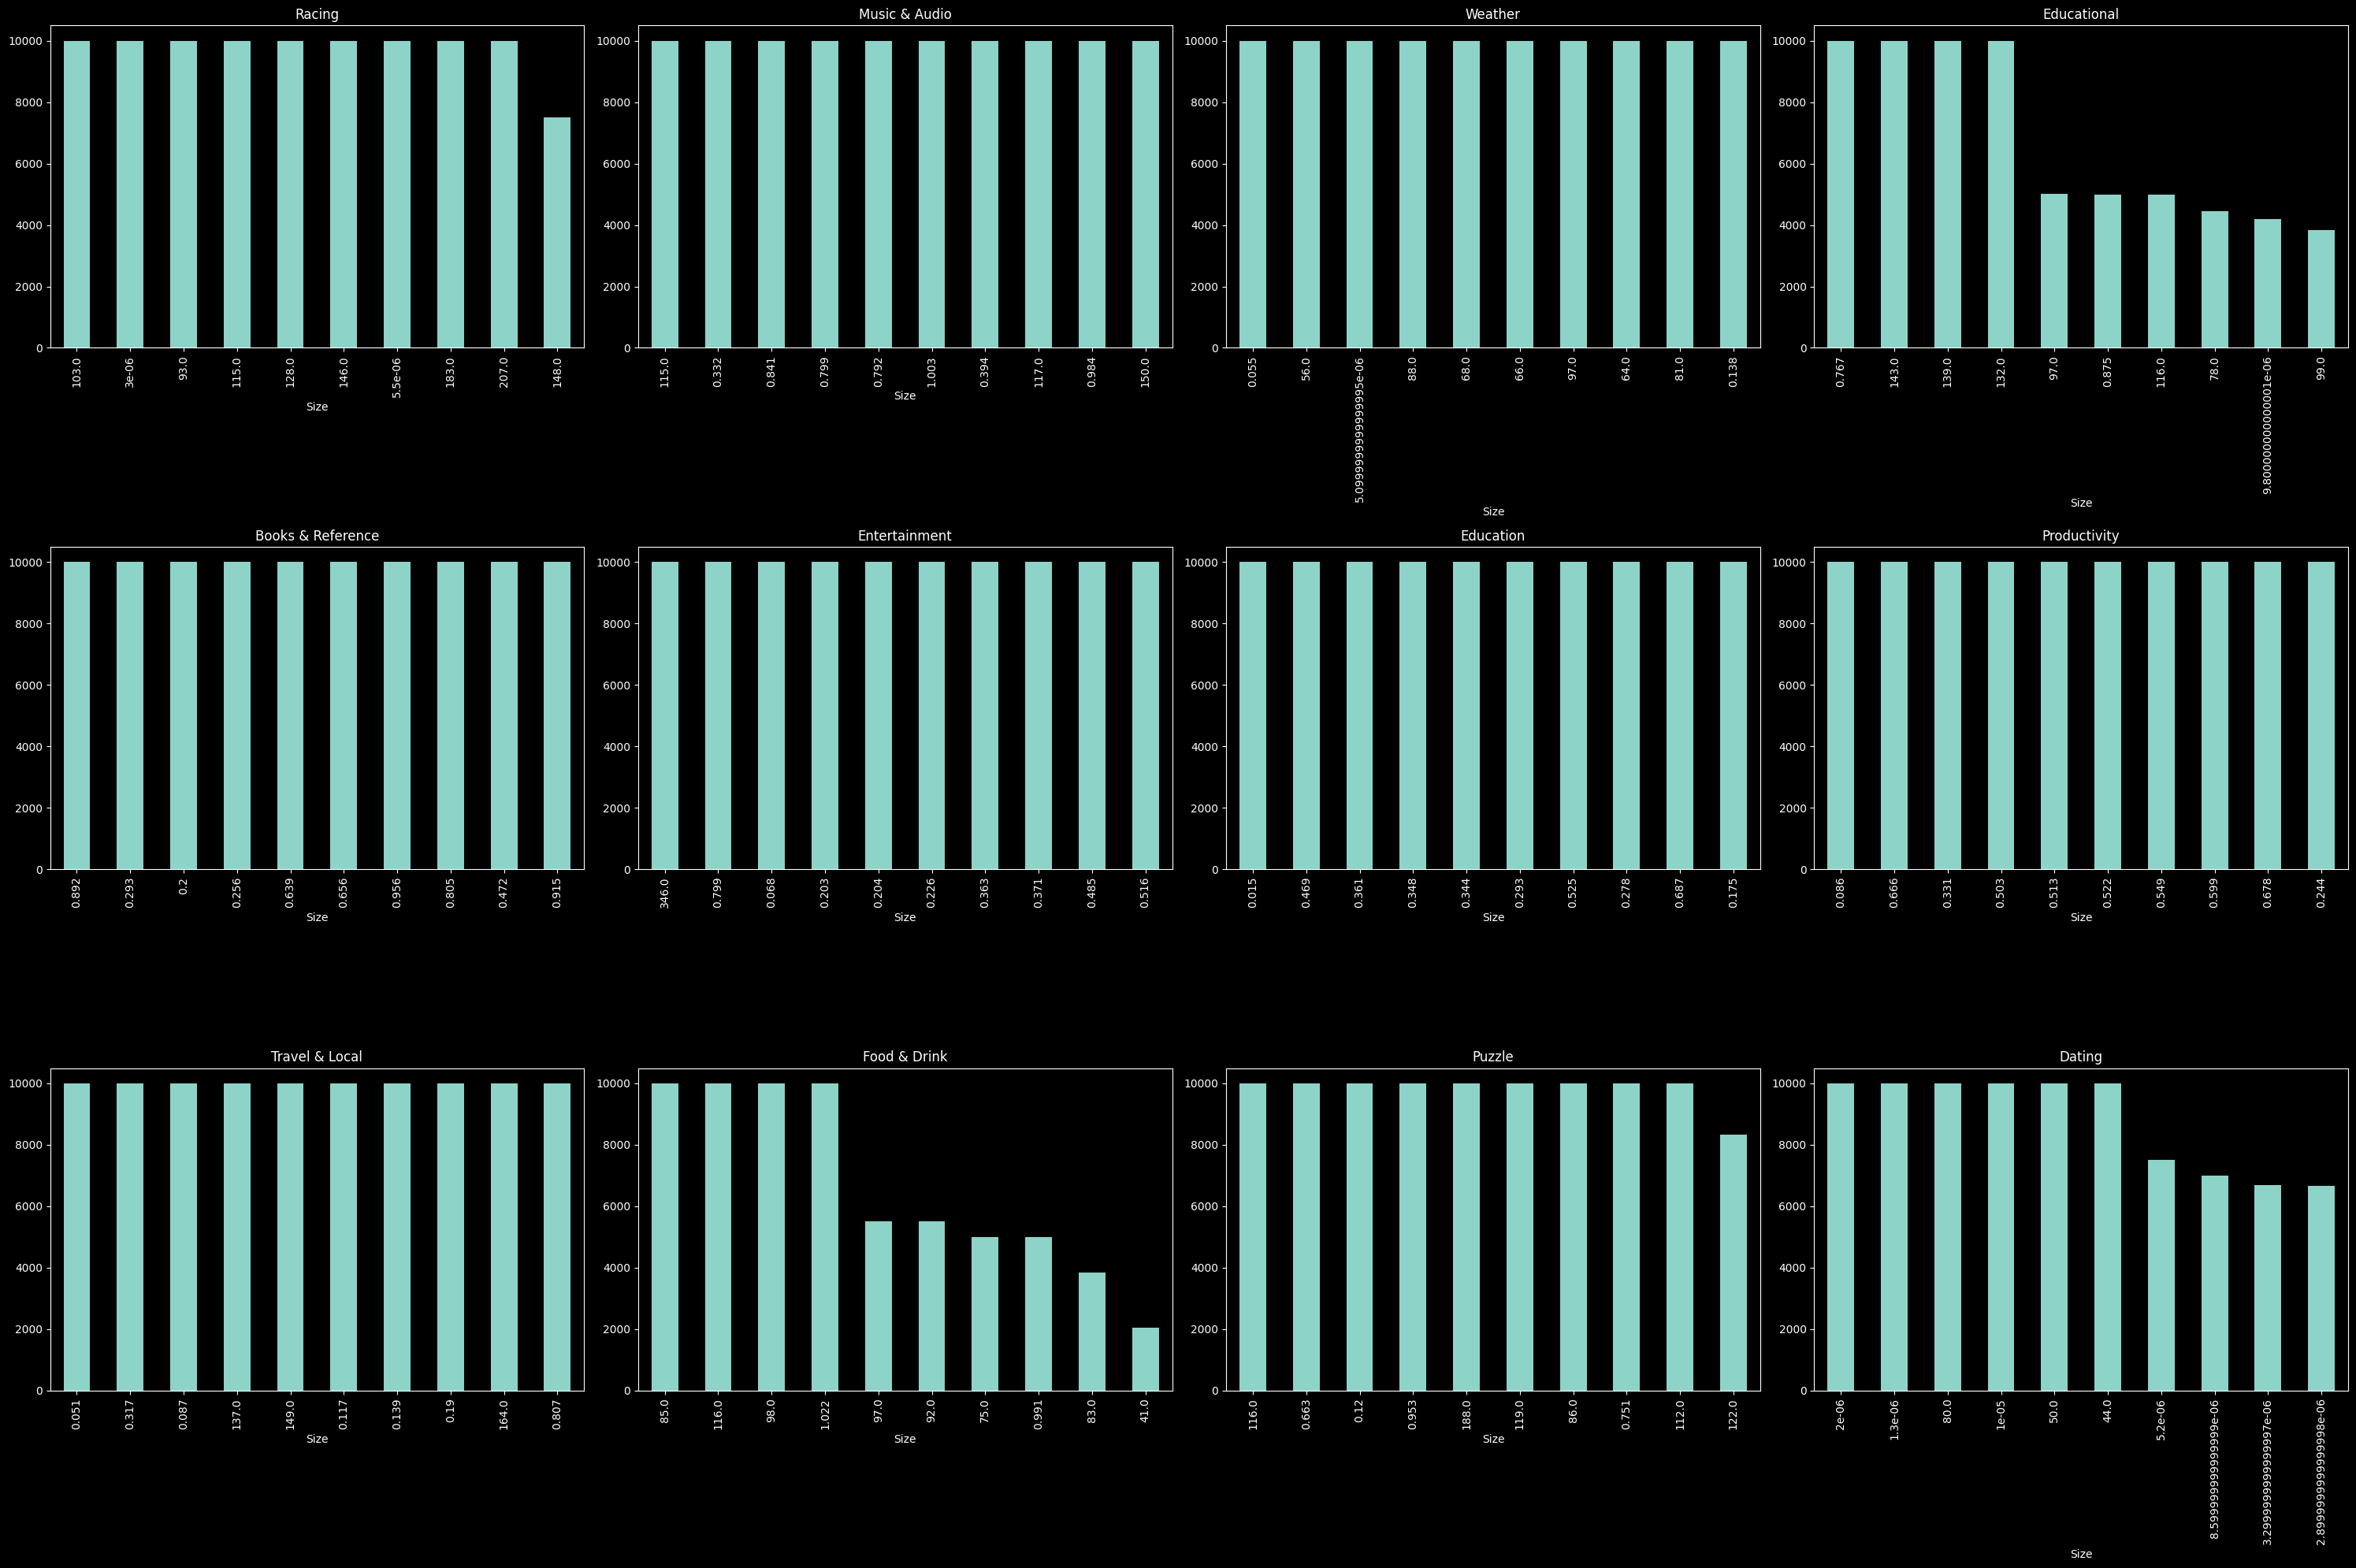

In [16]:
sub_blot(df, "Category", "Size", "Installs", "Mean Ratings by Last Updated for each category")

### Results:
    - number of installs is slightly affected by size, for some categories we
      can see that apps with very high sizes got less installs,but it's a not 
      key factor

## Question 3
    Is there a relation between install and minimum android version?

## Results

1- minimize number of version by combining them in larger groups

In [18]:
df['Minimum Android'] = df['Minimum Android'].str[:3]
df['Minimum Android'] = pd.to_numeric(df['Minimum Android'], errors='coerce')
print("Number of unique values in Minimum Android: ", df['Minimum Android'].nunique())

Number of unique values in Minimum Android:  23


2- group all apps by minimum android version 

<Axes: xlabel='Minimum Android'>

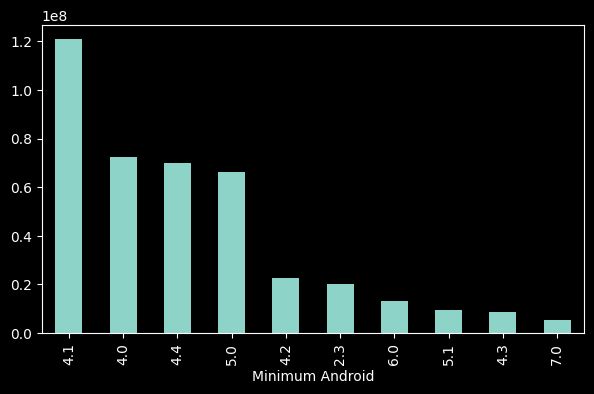

In [19]:
content_rating = df.groupby('Minimum Android')['Installs'].sum().sort_values(ascending=False).head(10)
content_rating.nlargest(15).plot(kind='bar', figsize=(7, 4))

## Results
- apps that support medium android version that available for majority of users
  had the highest number of installs.
- so company may consider a reasonable android version when launching new app to 
  guarantee high number of installs


## Question 4
    Is there a relation between installs and Rating of app ?

### Add rating value column to represent real representation for the rating

In [21]:
df['Rating Count'] = df['Rating Count'].astype(float)
df['Rating_Value'] = df['Rating'] * df['Rating Count']

Text(0, 0.5, 'Installs')

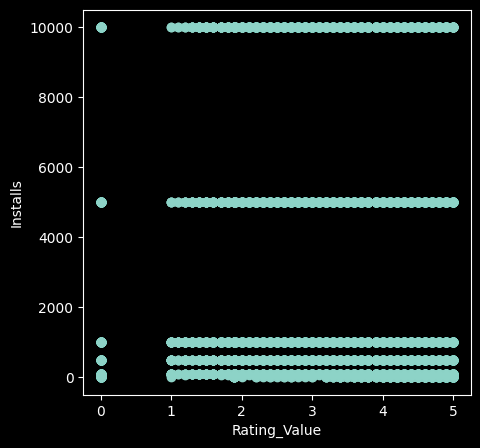

In [24]:
plt.figure(figsize=(5,5))
plt.scatter(df['Rating'], df['Installs'])
plt.xlabel('Rating_Value')
plt.ylabel('Installs')

Top 10 Developers w.r.t number of installs

<Axes: title={'center': 'Top 10 Developers with highest rating value'}, xlabel='Developer Id'>

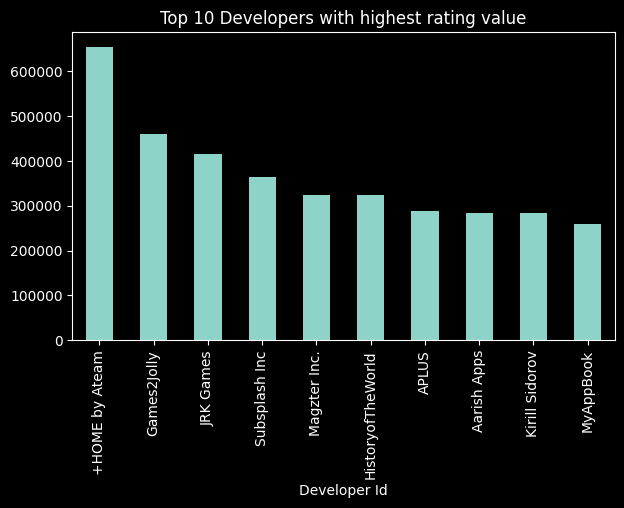

In [25]:
top_10_developers = df.groupby('Developer Id')['Installs'].sum().sort_values(ascending=False).head(10)
top_10_developers.nlargest(20).plot(kind='bar', figsize=(7, 4), title='Top 10 Developers with highest rating value')

## Results
  - No correlation between ratings and number of installs.
  - Top 10 developers w.r.t installs are not the same as top 10 w.r.t rating which
    may ensure this un correlation.
  - so installs son't reflect how good the app is specially that we don't have 
    column for number of uninstalls.
